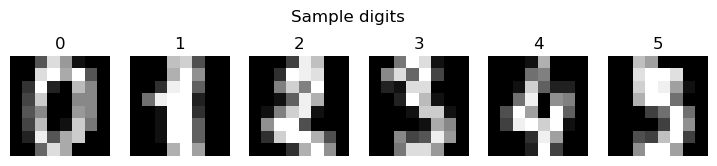

Test Accuracy: 0.951

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9778    0.9888        45
           1     0.8776    0.9348    0.9053        46
           2     0.9556    0.9773    0.9663        44
           3     1.0000    0.9783    0.9890        46
           4     0.9348    0.9556    0.9451        45
           5     0.9545    0.9130    0.9333        46
           6     0.9773    0.9556    0.9663        45
           7     0.9375    1.0000    0.9677        45
           8     0.9730    0.8372    0.9000        43
           9     0.9167    0.9778    0.9462        45

    accuracy                         0.9511       450
   macro avg     0.9527    0.9507    0.9508       450
weighted avg     0.9525    0.9511    0.9509       450



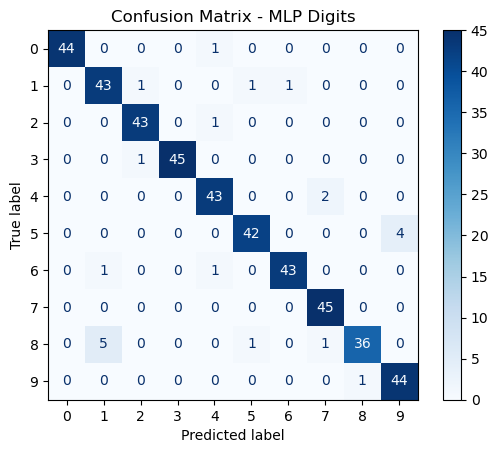

Best Parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (128, 64), 'mlpclassifier__learning_rate_init': 0.0005, 'mlpclassifier__max_iter': 200}
Best CV accuracy: 0.9472902746844841


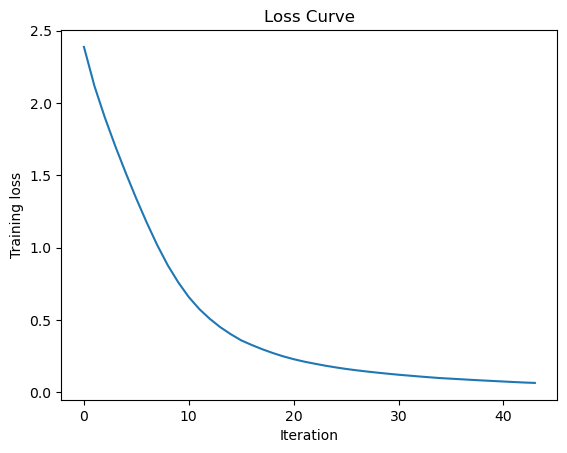

In [42]:
# Step 1: Import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
# Step 2: Load Dataset
digits = load_digits()
X, y = digits.data, digits.target

# preview a few images
fig, axes = plt.subplots(1, 6, figsize=(9,2))
for ax, image, label in zip(axes, digits.images[:6], y[:6]):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(label)
plt.suptitle('Sample digits')
plt.show()

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Step 4: Create a pipeline
pipe = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(100,),
                  activation='relu',
                  alpha=0.0001,
                  learning_rate_init=0.0005,
                  early_stopping=True,
                  max_iter=500,
                  random_state=42)
)

# Step 5: Fit the network
pipe.fit(X_train, y_train)

# Step 6: Evaluate on the test data
print("Test Accuracy: {:.3f}".format(pipe.score(X_test, y_test)))
y_pred = pipe.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=digits.target_names).plot(cmap='Blues', colorbar=True)
plt.title('Confusion Matrix - MLP Digits')
plt.show()

# Step 7: Gridsearch for better hyper-parameters
param_grid = {
    "mlpclassifier__hidden_layer_sizes": [(100,), (128, 64)],
    "mlpclassifier__alpha":              [1e-4, 1e-3, 1e-2],
    "mlpclassifier__learning_rate_init": [0.001, 0.0005],
    "mlpclassifier__max_iter":           [200, 300, 500]
}

grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# plot the loss curve of the best model
mlp = grid.best_estimator_.named_steps['mlpclassifier']
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.title('Loss Curve')
plt.show()
